In [1]:
include("src/Whirl.jl")
using Whirl

In [ ]:
w = Nodes(Dual,(5,4))
w .= reshape(1:20,5,4)

In [ ]:
q = Edges(Primal,w);
q.u[2,3] = 1;
q

In [ ]:
curl(w)

In [ ]:
q = Edges(Primal,w)
curl!(q,w)

In [ ]:
C = Curl()
D = Divergence()
G = Grad()
# G*(C*q)

In [ ]:
(C*q)

In [ ]:
L = Laplacian(size(w),with_inverse=true)

In [ ]:
using Plots
pyplot()

w = Nodes(Dual,(50,10));
w[20,5] = 1.0
L = Laplacian(w,with_inverse=true)
plot(L\w)
savefig("Linvw.svg"); nothing # hide

In [ ]:
w = Nodes(Dual,(100,100));
w[40,50] = 1.0
plot(w)
savefig("w1.svg"); nothing # hide

In [ ]:
E = IntFact(5,w)
plot(E*w)
savefig("Ew1.svg"); nothing # hide

In [ ]:
E = IntFact(10,w)
plot(E*w)
savefig("Ew2.svg"); nothing # hide

In [2]:
using Plots
pyplot()

n = 100
θ = linspace(0,2π,n+1)
x = 0.5 + 0.25*cos.(θ[1:n])
y = 0.5 + 0.25*sin.(θ[1:n])
ds = 2π/n*0.25
X = VectorData(x,y)

100 points of vector-valued data
 0.75      0.5     
 0.749507  0.515698
 0.748029  0.531333
 0.745572  0.546845
 0.742146  0.562172
 0.737764  0.577254
 0.732444  0.592031
 0.726207  0.606445
 0.719077  0.620438
 0.711082  0.633957
 0.702254  0.646946
 0.692628  0.659356
 0.682242  0.671137
 ⋮                 
 0.682242  0.328863
 0.692628  0.340644
 0.702254  0.353054
 0.711082  0.366043
 0.719077  0.379562
 0.726207  0.393555
 0.732444  0.407969
 0.737764  0.422746
 0.742146  0.437828
 0.745572  0.453155
 0.748029  0.468667
 0.749507  0.484302

In [3]:
f = VectorData(X)
fill!(f.u,1.0)
f.v .= X.v.-0.5
f

100 points of vector-valued data
 1.0   0.0      
 1.0   0.0156976
 1.0   0.0313333
 1.0   0.0468453
 1.0   0.0621725
 1.0   0.0772542
 1.0   0.0920311
 1.0   0.106445 
 1.0   0.120438 
 1.0   0.133957 
 1.0   0.146946 
 1.0   0.159356 
 1.0   0.171137 
 ⋮              
 1.0  -0.171137 
 1.0  -0.159356 
 1.0  -0.146946 
 1.0  -0.133957 
 1.0  -0.120438 
 1.0  -0.106445 
 1.0  -0.0920311
 1.0  -0.0772542
 1.0  -0.0621725
 1.0  -0.0468453
 1.0  -0.0313333
 1.0  -0.0156976

In [5]:
nx = 102; ny = 102
q = Edges(Primal,(nx,ny))
Lx = 1.0
dx = Lx/(nx-2)
H = Regularize(X,dx,weights=ds)

Regularization/interpolation operator with non-filtered interpolation
  100 points in grid with cell area 0.0001


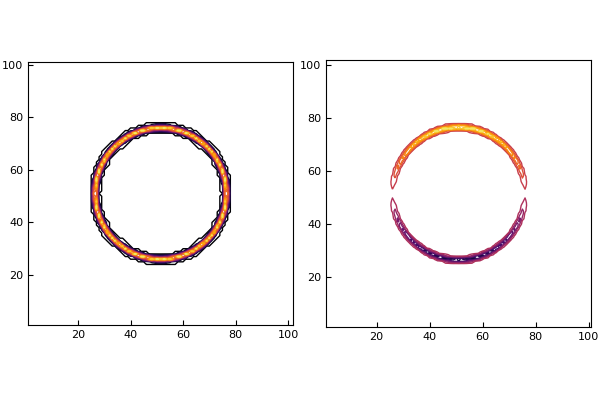

In [6]:
H(q,f)
plot(q)